In [1]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats
import umap as umap
import gower


def load_data(filepath):
    '''takes in the file path where the data is store and returns a pandas dataframe.
    filepath must be entered as a string
    '''
    
    df = pd.read_csv(filepath)
    return df;

filepath = '../data/portfolio3_ETL.csv'
portfolio3 = load_data(filepath)

portfolio3 = portfolio3.drop(columns=['id'])
portfolio3.head()

idade_empresa_anos  de_faixa_faturamento_estimado_ATE R$ 81.000,00  \
0               21.81                                               0   
1               16.39                                               0   
2               40.38                                               0   
3               43.85                                               0   
4               43.87                                               0   

   de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00  \
0                                                  0                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00  \
0                                                  0                      
1                                                  1                      
2                                                  0                      
3                                                  1                      
4                                                  0                      

   de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00  \
0                                                  1                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

   de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00  \
0                                                  0                       
1                                                  0                       
2                                                  1                       
3                                                  0                       
4                                                  1                       

   de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00  \
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

   de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS  \
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                 

In [2]:
portfolio3.select_dtypes(exclude='int64')

idade_empresa_anos
0                 21.81
1                 16.39
2                 40.38
3                 43.85
4                 43.87
..                  ...
260               18.98
261               22.49
262               12.75
263               26.40
264               10.79

[265 rows x 1 columns]

In [3]:
idade_standarized = portfolio3['idade_empresa_anos'].apply(lambda x: (x-portfolio3['idade_empresa_anos'].mean())/portfolio3['idade_empresa_anos'].std()) 


idade_standarized

0     -0.421601
1     -0.805471
2      0.893618
3      1.139380
4      1.140797
         ...   
260   -0.622035
261   -0.373440
262   -1.063274
263   -0.096514
264   -1.202091
Name: idade_empresa_anos, Length: 265, dtype: float64

In [4]:
idade_normalized = portfolio3['idade_empresa_anos'].apply(lambda x: (x-portfolio3['idade_empresa_anos'].min())/(portfolio3['idade_empresa_anos'].max()-portfolio3['idade_empresa_anos'].min()))

idade_normalized

0      0.412341
1      0.306170
2      0.776102
3      0.844074
4      0.844466
         ...   
260    0.356905
261    0.425661
262    0.234868
263    0.502253
264    0.196474
Name: idade_empresa_anos, Length: 265, dtype: float64

In [5]:
All_zero_cols = []
for col in portfolio3.columns:
    if portfolio3[col].sum() == 0:
        All_zero_cols.append(col)

All_zero_cols

['de_faixa_faturamento_estimado_ATE R$ 81.000,00',
 'de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00',
 'de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00',
 'de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00',
 'de_faixa_faturamento_estimado_DE R$ 81.000,01 A R$ 360.000,00',
 'de_faixa_faturamento_estimado_grupo_ATE R$ 81.000,00',
 'de_faixa_faturamento_estimado_grupo_DE R$ 1.500.000,01 A R$ 4.800.000,00',
 'de_faixa_faturamento_estimado_grupo_DE R$ 360.000,01 A R$ 1.500.000,00',
 'de_faixa_faturamento_estimado_grupo_DE R$ 4.800.000,01 A R$ 10.000.000,00',
 'de_faixa_faturamento_estimado_grupo_DE R$ 81.000,01 A R$ 360.000,00',
 'de_faixa_faturamento_estimado_grupo_nan',
 'de_faixa_faturamento_estimado_nan',
 'de_nivel_atividade_MUITO BAIXA',
 'de_nivel_atividade_nan',
 'de_saude_rescencia_ATE 3 MESES',
 'de_saude_rescencia_ATE 6 MESES',
 'de_saude_rescencia_nan',
 'de_saude_tributaria_nan',
 'fl_epp',
 'fl_me',
 'fl_mei',
 'fl_rm',
 

In [6]:
df_no_zero_cols = portfolio3[portfolio3.columns.difference(All_zero_cols)]
df_no_zero_cols

de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00  \
0                                                    0                      
1                                                    1                      
2                                                    0                      
3                                                    1                      
4                                                    0                      
..                                                 ...                      
260                                                  1                      
261                                                  0                      
262                                                  0                      
263                                                  0                      
264                                                  0                      

     de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00  \
0                                                    1                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
260                                                  0                        
261                                                  0                        
262                                                  0                        
263                                                  0                        
264                                                  0                        

     de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00  \
0                                                    0                       
1                                                    0                       
2                                                    1                       
3                                                    0                       
4                                                    1                       
..                                                 ...                       
260                                                  0                       
261                                                  1                       
262                                                  1                       
263                                                  1                       
264                                                  0                       

     de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00  \
0                                                    0                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
260                                                  0                        
261                                                  0                        
262                                                  0                        
263                                                  0                        
264                                                  1                        

     de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS  \
0                                                    0                        
1                                                    0                        
2       

In [7]:
normalized = portfolio3
normalized['idade_empresa_anos'] = idade_normalized
normalized

idade_empresa_anos  de_faixa_faturamento_estimado_ATE R$ 81.000,00  \
0              0.412341                                               0   
1              0.306170                                               0   
2              0.776102                                               0   
3              0.844074                                               0   
4              0.844466                                               0   
..                  ...                                             ...   
260            0.356905                                               0   
261            0.425661                                               0   
262            0.234868                                               0   
263            0.502253                                               0   
264            0.196474                                               0   

     de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00  \
0                                                    0                    
1                                                    0                    
2                                                    0                    
3                                                    0                    
4                                                    0                    
..                                                 ...                    
260                                                  0                    
261                                                  0                    
262                                                  0                    
263                                                  0                    
264                                                  0                    

     de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00  \
0                                                    0                      
1                                                    1                      
2                                                    0                      
3                                                    1                      
4                                                    0                      
..                                                 ...                      
260                                                  1                      
261                                                  0                      
262                                                  0                      
263                                                  0                      
264                                                  0                      

     de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00  \
0                                                    1                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
260                                                  0                        
261                                                  0                        
262                                                  0                        
263                                                  0                        
264                                                  0                        

     de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00  \
0                                                    0                       
1                                                    0                       
2                                                    1                       
3                

In [8]:
normalized_no_zero_cols = df_no_zero_cols
normalized_no_zero_cols.loc[:,'idade_empresa_anos'] = idade_normalized
normalized_no_zero_cols

c:\users\ricardo_2\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00  \
0                                                    0                      
1                                                    1                      
2                                                    0                      
3                                                    1                      
4                                                    0                      
..                                                 ...                      
260                                                  1                      
261                                                  0                      
262                                                  0                      
263                                                  0                      
264                                                  0                      

     de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00  \
0                                                    1                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
260                                                  0                        
261                                                  0                        
262                                                  0                        
263                                                  0                        
264                                                  0                        

     de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00  \
0                                                    0                       
1                                                    0                       
2                                                    1                       
3                                                    0                       
4                                                    1                       
..                                                 ...                       
260                                                  0                       
261                                                  1                       
262                                                  1                       
263                                                  1                       
264                                                  0                       

     de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00  \
0                                                    0                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
260                                                  0                        
261                                                  0                        
262                                                  0                        
263                                                  0                        
264                                                  1                        

     de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS  \
0                                                    0                        
1                                                    0                        
2       

In [9]:
standarized = portfolio3
standarized['idade_empresa_anos'] = idade_standarized
standarized

idade_empresa_anos  de_faixa_faturamento_estimado_ATE R$ 81.000,00  \
0             -0.421601                                               0   
1             -0.805471                                               0   
2              0.893618                                               0   
3              1.139380                                               0   
4              1.140797                                               0   
..                  ...                                             ...   
260           -0.622035                                               0   
261           -0.373440                                               0   
262           -1.063274                                               0   
263           -0.096514                                               0   
264           -1.202091                                               0   

     de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00  \
0                                                    0                    
1                                                    0                    
2                                                    0                    
3                                                    0                    
4                                                    0                    
..                                                 ...                    
260                                                  0                    
261                                                  0                    
262                                                  0                    
263                                                  0                    
264                                                  0                    

     de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00  \
0                                                    0                      
1                                                    1                      
2                                                    0                      
3                                                    1                      
4                                                    0                      
..                                                 ...                      
260                                                  1                      
261                                                  0                      
262                                                  0                      
263                                                  0                      
264                                                  0                      

     de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00  \
0                                                    1                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
260                                                  0                        
261                                                  0                        
262                                                  0                        
263                                                  0                        
264                                                  0                        

     de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00  \
0                                                    0                       
1                                                    0                       
2                                                    1                       
3                

In [10]:
standarized_no_zero_cols = df_no_zero_cols
standarized_no_zero_cols.loc[:,'idade_empresa_anos'] = idade_standarized
standarized_no_zero_cols

c:\users\ricardo_2\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00  \
0                                                    0                      
1                                                    1                      
2                                                    0                      
3                                                    1                      
4                                                    0                      
..                                                 ...                      
260                                                  1                      
261                                                  0                      
262                                                  0                      
263                                                  0                      
264                                                  0                      

     de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00  \
0                                                    1                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
260                                                  0                        
261                                                  0                        
262                                                  0                        
263                                                  0                        
264                                                  0                        

     de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00  \
0                                                    0                       
1                                                    0                       
2                                                    1                       
3                                                    0                       
4                                                    1                       
..                                                 ...                       
260                                                  0                       
261                                                  1                       
262                                                  1                       
263                                                  1                       
264                                                  0                       

     de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00  \
0                                                    0                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
260                                                  0                        
261                                                  0                        
262                                                  0                        
263                                                  0                        
264                                                  1                        

     de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS  \
0                                                    0                        
1                                                    0                        
2       

In [11]:
dissimilarity_matrix = gower.gower_matrix(standarized)
dissimilarity_matrix

array([[0.        , 0.05812309, 0.07687005, ..., 0.07108274, 0.06164734,
        0.06785928],
       [0.05812309, 0.        , 0.08888247, ..., 0.0809896 , 0.06716108,
        0.08525076],
       [0.07687005, 0.08888247, 0.        , ..., 0.02138236, 0.04552991,
        0.07576381],
       ...,
       [0.07108274, 0.0809896 , 0.02138236, ..., 0.        , 0.06277293,
        0.06627666],
       [0.06164734, 0.06716108, 0.04552991, ..., 0.06277293, 0.        ,
        0.08930902],
       [0.06785928, 0.08525076, 0.07576381, ..., 0.06627666, 0.08930902,
        0.        ]], dtype=float32)

In [12]:
dissimilarity_matrix.shape

(265, 265)

In [48]:
np.percentile(dissimilarity_matrix,25), dissimilarity_matrix.min(),dissimilarity_matrix.max()

(0.04469223693013191, 0.0, 0.11737695)

Text(0.5, 0, 'Epsilon distance')

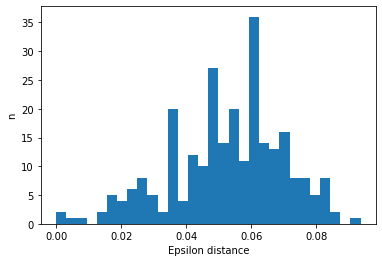

In [39]:
eps_dist = dissimilarity_matrix[0]
plt.hist(eps_dist,bins=30)
plt.ylabel('n');
plt.xlabel('Epsilon distance')

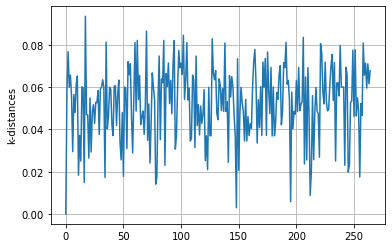

In [40]:
d = dissimilarity_matrix[0]
plt.plot(d)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

In [63]:
from sklearn.cluster import DBSCAN
from sklearn import metrics





# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.055, min_samples=25,metric='precomputed').fit(dissimilarity_matrix)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_, n_noise_

(1, 0)

In [20]:
from pyclustering.cluster.kmedoids import kmedoids

# set random initial medoids
initial_medoids = [1, 10, 50, 100]
# create K-Medoids algorithm for processing distance matrix instead of points
kmedoids_instance = kmedoids(dissimilarity_matrix, initial_medoids, data_type='distance_matrix')
# run cluster analysis and obtain results
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()

medoids = kmedoids_instance.get_medoids()


In [94]:
teste = np.hstack(clusters)
teste

array([ 66,   1,   3,  23,  31,  32,  44,  55,  60,  72,  73,  76,  88,
        89,  91, 101, 103, 104, 108, 113, 114, 116, 129, 134, 153, 158,
       177, 180, 191, 193, 214, 221, 256, 224,   7,   9,  10,  15,  17,
        19,  40,  43,  54,  56,  65,  70,  75,  83,  84,  90,  94,  98,
       102, 106, 117, 128, 130, 140, 142, 144, 171, 178, 192, 194, 206,
       210, 216, 218, 219, 225, 229, 231, 233, 238, 260, 262,  16,   0,
         6,  11,  12,  13,  20,  22,  25,  34,  41,  48,  50,  52,  53,
        58,  71,  78,  79,  95,  96, 112, 118, 119, 121, 122, 123, 125,
       126, 141, 148, 150, 159, 161, 166, 170, 174, 181, 195, 202, 203,
       207, 209, 212, 213, 215, 220, 234, 245, 247, 253, 255, 264, 160,
         2,   4,   5,   8,  14,  18,  21,  24,  26,  27,  28,  29,  30,
        33,  35,  36,  37,  38,  39,  42,  45,  46,  47,  49,  51,  57,
        59,  61,  62,  63,  64,  67,  68,  69,  74,  77,  80,  81,  82,
        85,  86,  87,  92,  93,  97,  99, 100, 105, 107, 109, 11

In [68]:
medoids

[66, 224, 16, 160]

In [95]:
from sklearn import metrics

silhouette_avg = metrics.silhouette_score(standarized, teste)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)



ValueError: Number of labels is 265. Valid values are 2 to n_samples - 1 (inclusive)

In [81]:
from pyclustering.cluster import cluster_visualizer

visualizer = cluster_visualizer(1)
visualizer.append_clusters(clusters, dissimilarity_matrix, 0)
visualizer.append_cluster([dissimilarity_matrix[index] for index in initial_medoids], marker='*', markersize=15)
visualizer.append_cluster(medoids, data=dissimilarity_matrix, marker='*', markersize=15)
visualizer.show()

ValueError: Only objects with size dimension 1 (1D plot), 2 (2D plot) or 3 (3D plot) can be displayed. For multi-dimensional data use 'cluster_visualizer_multidim'.

In [78]:
from pyclustering.cluster.silhouette import silhouette

score = silhouette(dissimilarity_matrix, clusters, metric=USER_DEFINED).process().get_score()
score

NameError: name 'USER_DEFINED' is not defined

In [74]:
plt(score)

TypeError: 'module' object is not callable

<ipython-input-35-d1cacb766fbb>:7: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



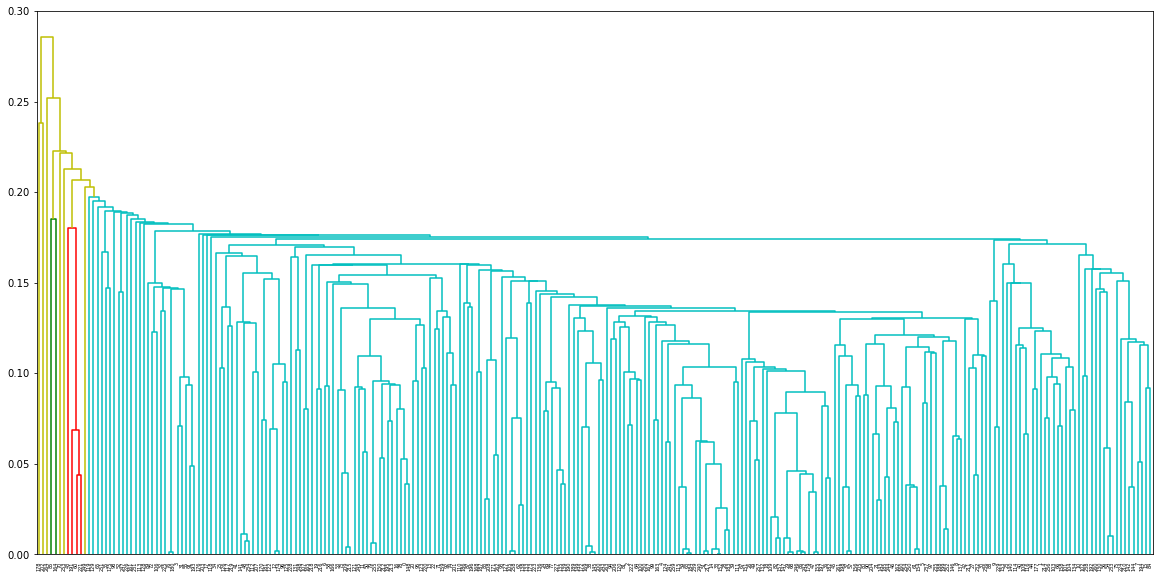

In [35]:
from scipy.cluster import hierarchy

import matplotlib.pyplot as plt

ytdist = np.array(dissimilarity_matrix)

Z = hierarchy.linkage(ytdist, 'single')

#plt.figure()

#dn = hierarchy.dendrogram(Z)


#hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])

plt.figure(figsize=(20, 10))

dn1 = hierarchy.dendrogram(Z, above_threshold_color='y',

                           orientation='top')

#dn2 = hierarchy.dendrogram(Z, ax=axes[1],

                           #above_threshold_color='#bcbddc',

                           #orientation='right')

#hierarchy.set_link_color_palette(None)  # reset to default after use

plt.show()

In [5]:
#To fixate the results between attempts we'll set the random state to 42
random_state = 42

reducer = umap.UMAP()
embedding = reducer.fit_transform(portfolio3)
embedding.shape

(265, 2)

Text(0.5, 1.0, 'UMAP projection of portfolio3')

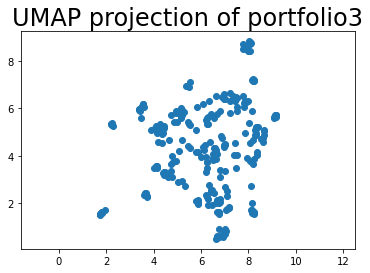

In [6]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
    #c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of portfolio3', fontsize=24)

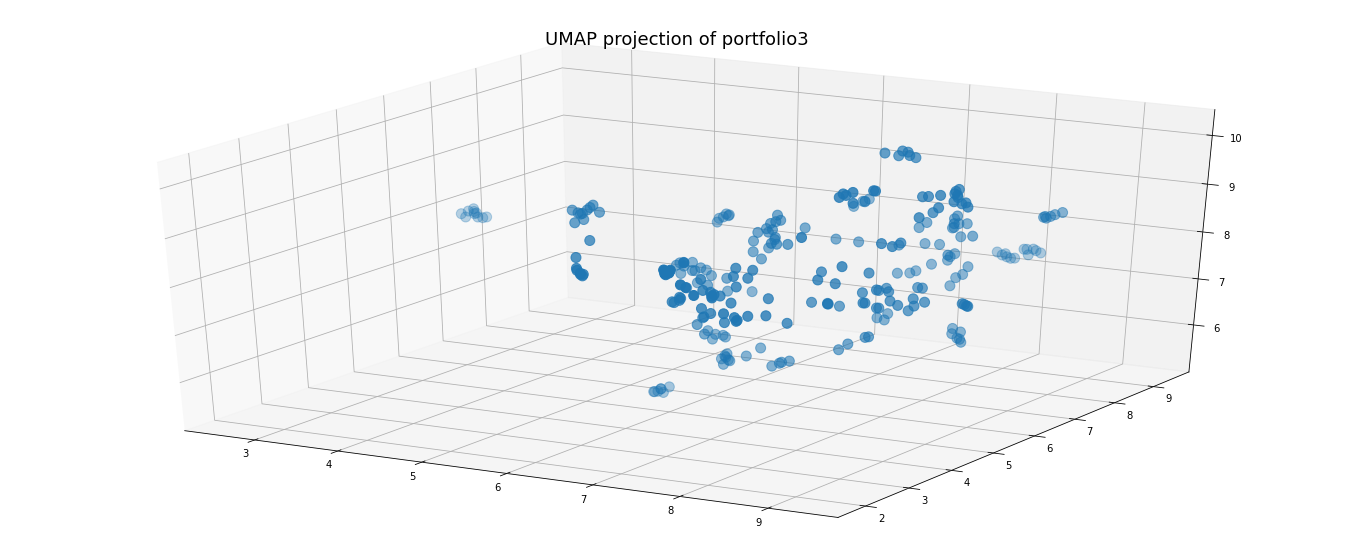

In [7]:

def draw_umap(data, n_neighbors, min_dist, n_components, title, metric='euclidean'):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure(figsize=(24,10))
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)
    
title = 'UMAP projection of portfolio3'    
draw_umap(portfolio3,14,0.1,3,title)

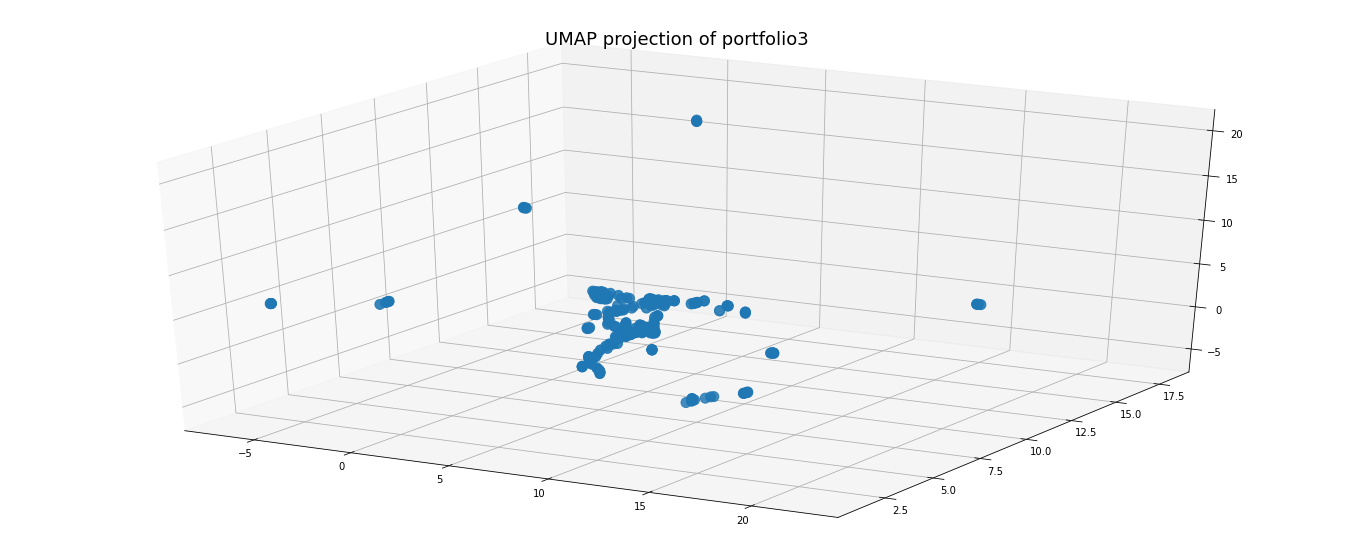

In [8]:
#low n_neighbours focus more on local distribution
draw_umap(portfolio3,5,0.1,3,title)

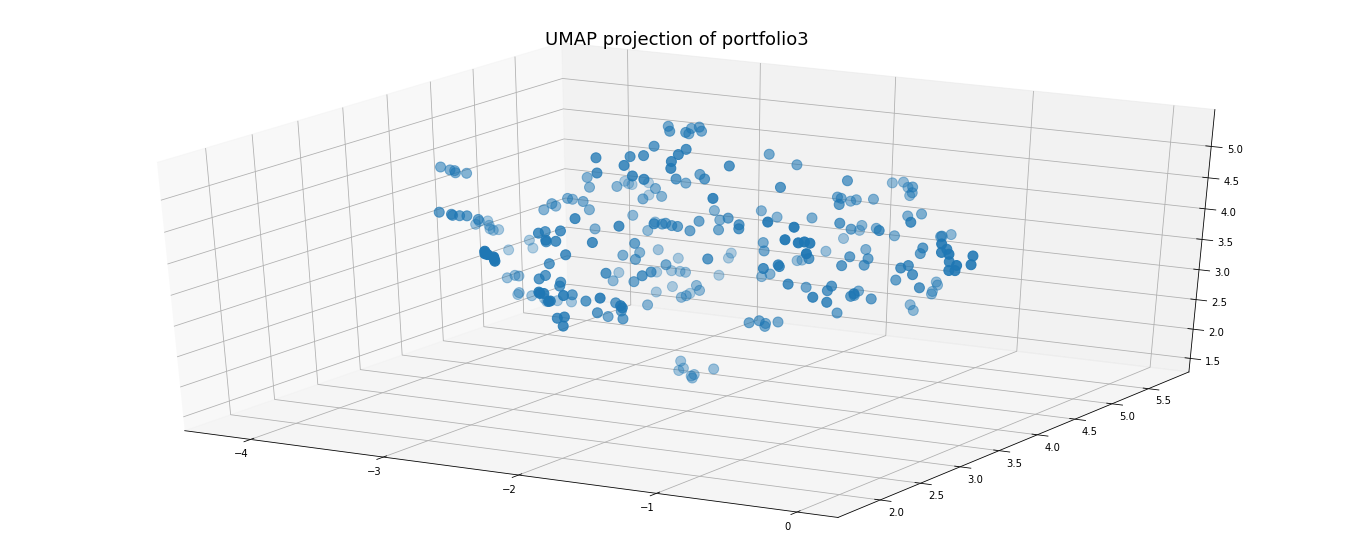

In [9]:
#high n_neighbours focus more on global distribution
draw_umap(portfolio3,50,0.1,3,title)

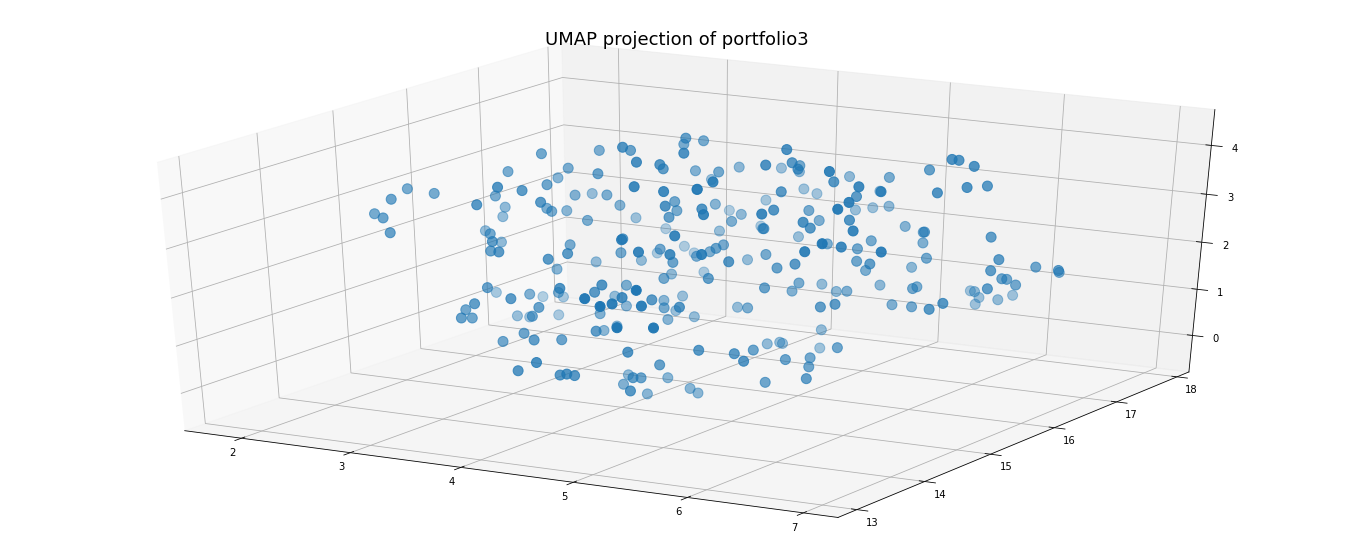

In [10]:
draw_umap(portfolio3,50,0.5,3,title)

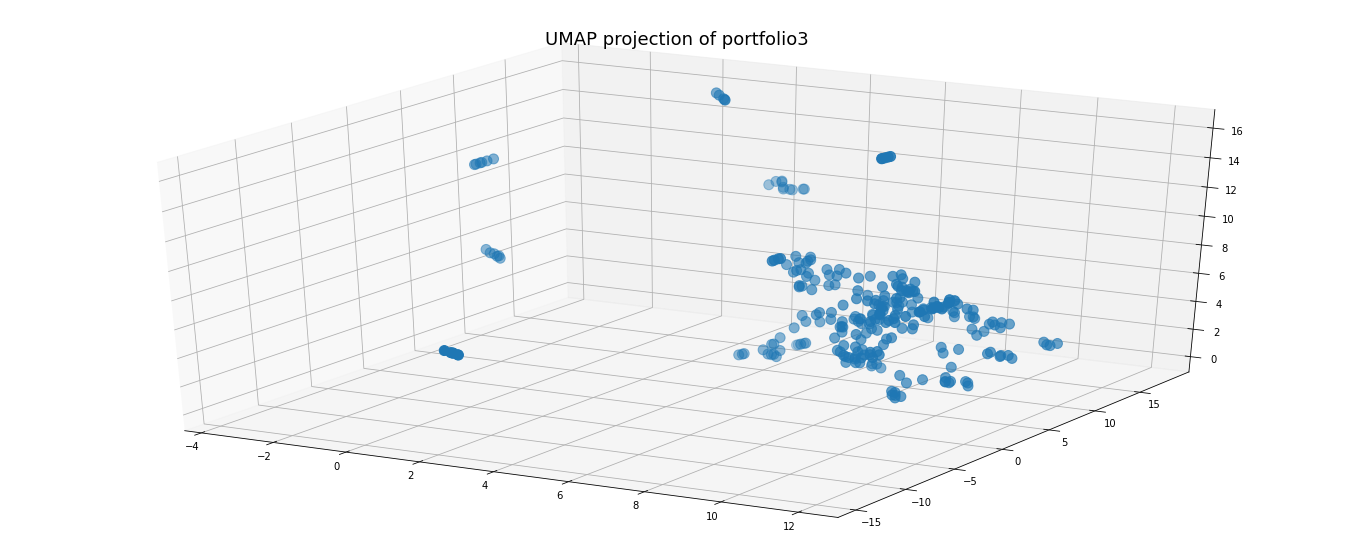

In [11]:
draw_umap(portfolio3,5,0.5,3,title)

In [12]:
from sklearn.neighbors import LocalOutlierFactor

outlier_scores = LocalOutlierFactor(contamination=0.001428).fit_predict(portfolio3)

In [13]:
outlying_digits = portfolio3[outlier_scores == -1]
outlying_digits.shape

(1, 174)

In [14]:
mapper = umap.UMAP().fit(portfolio3)
outlier_scores_umap = LocalOutlierFactor(contamination=0.001428).fit_predict(mapper.embedding_)

In [15]:
outlying_digits_umap = portfolio3[outlier_scores_umap == -1]
outlying_digits_umap.shape

(1, 174)

In [16]:
mapper = umap.UMAP(set_op_mix_ratio=0.25).fit(portfolio3)
outlier_scores_umap = LocalOutlierFactor(contamination=0.001428).fit_predict(mapper.embedding_)
outlying_digits_umap = portfolio3[outlier_scores_umap == -1]
outlying_digits_umap.shape

(1, 174)

In [17]:

fit = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=3,
        metric='euclidean'
    )
u = fit.fit_transform(portfolio3)

In [18]:
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = random_state)
    kmeans.fit(u)
    wss.append(kmeans.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wss, name='elbow', mode='lines'))

fig.update_layout(title='The Elbow Method', 
                  xaxis={"title": "Number of clusters"},
                  yaxis={"title": "Within Sum of Squares"})

fig.show()

In [19]:
X = fit.fit_transform(portfolio3)
number_clusters = 4
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], z=X[y_kmeans == 0, 2], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], z=X[y_kmeans == 1, 2], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], z=X[y_kmeans == 2, 2], name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], z=X[y_kmeans == 3, 2], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#add more lines if you chose more clusters

fig.add_trace(go.Scatter3d(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],z=kmeans.cluster_centers_[:, 2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()

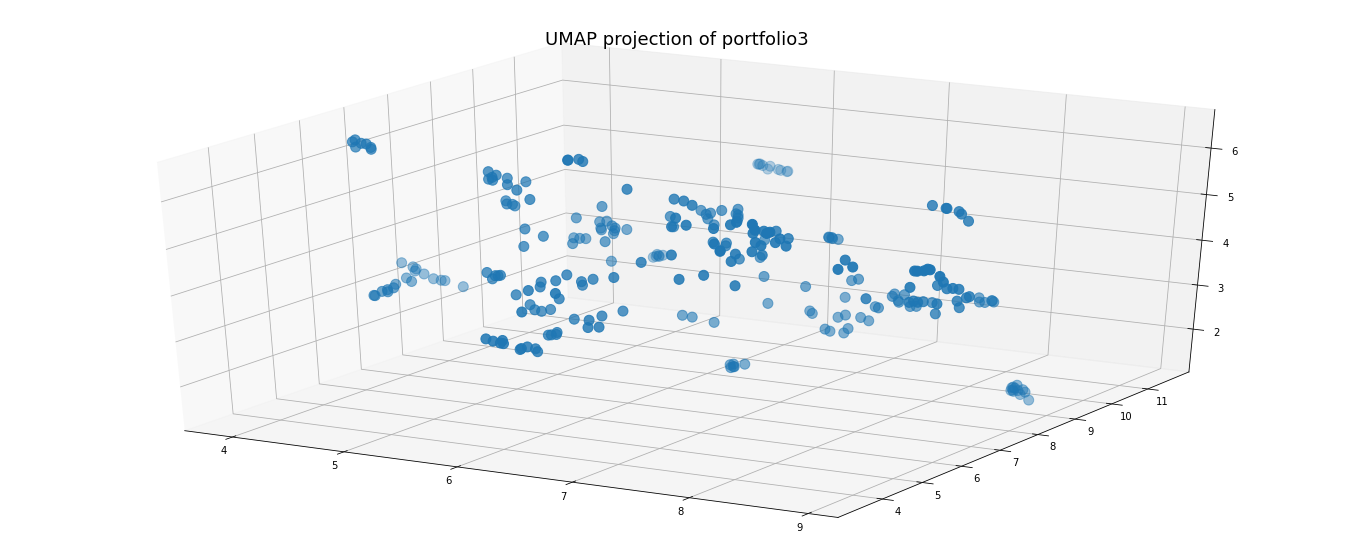

In [20]:
draw_umap(df,14,0.1,3,title)

In [21]:
fit = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=3,
        metric='euclidean'
    )

X = fit.fit_transform(df)
number_clusters = 4
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], z=X[y_kmeans == 0, 2], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], z=X[y_kmeans == 1, 2], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], z=X[y_kmeans == 2, 2], name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], z=X[y_kmeans == 3, 2], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#add more lines if you chose more clusters

fig.add_trace(go.Scatter3d(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],z=kmeans.cluster_centers_[:, 2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()

In [22]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=4).fit(X)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [23]:
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_, n_noise_

(2, 0)

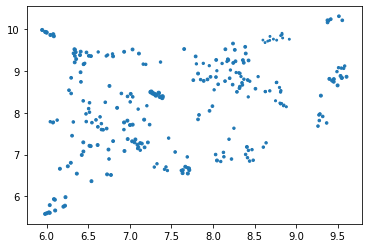

In [24]:
# turn it into a dataframe 
d = pd.DataFrame(X) 
  
# plot the data 
plt.scatter(d[0], d[1], d[2])

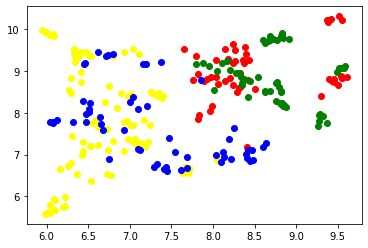

In [25]:
from sklearn import mixture
#gmm = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(X)


gmm = mixture.GaussianMixture(n_components = 4) 
  
# Fit the GMM model for the dataset  
# which expresses the dataset as a  
# mixture of 3 Gaussian Distribution 
gmm.fit(d) 
  
# Assign a label to each sample 
labels = gmm.predict(d) 
d['labels']= labels 
d0 = d[d['labels']== 0] 
d1 = d[d['labels']== 1] 
d2 = d[d['labels']== 2] 
d3 = d[d['labels']== 3]
  
# plot three clusters in same plot 
plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='yellow') 
plt.scatter(d2[0], d2[1], c ='g') 
plt.scatter(d3[0], d3[1], c ='b')
 


In [26]:
d.labels.value_counts()

1    101
3     57
2     55
0     52
Name: labels, dtype: int64

In [27]:
d0

0          1         2  labels
0    9.499906   8.657105  8.668118       0
6    8.428426   9.255306  7.904575       0
11   7.820769   8.940953  8.317521       0
13   8.237088   8.675270  7.215240       0
16   8.149549   9.523088  7.953119       0
18   8.036226   8.856888  7.068284       0
20   8.184903   9.263106  7.830832       0
22   8.418410   8.786009  7.436035       0
24   8.511516   8.577158  7.171257       0
26   7.958687   8.047420  7.307738       0
34   9.298766   8.411679  8.605459       0
35   8.408537   7.183474  8.315440       0
36   8.062742   8.684204  6.975589       0
40   7.763679   8.782517  7.405745       0
43   9.535452   8.884249  8.337037       0
48   8.262865   9.508403  7.860203       0
49   7.832102   7.950119  7.301416       0
52   7.791862   9.351487  7.786758       0
58   8.359928   9.262222  8.038062       0
69   9.556262  10.216619  7.204675       0
72   9.515580  10.313884  7.261429       0
79   8.244013   9.195494  7.757053       0
82   8.318768   8.589705  7.303216       0
86   9.607417   8.863867  8.357789       0
93   7.820315   7.842472  7.222962       0
95   8.038880   9.267339  7.914977       0
107  7.970692   8.862245  7.229329       0
108  9.417487  10.243763  7.352983       0
109  8.201094   8.829034  7.042004       0
112  9.392188  10.212970  7.364174       0
119  8.394708   9.421261  7.988903       0
123  8.370629   9.199334  7.753624       0
132  8.288547   8.502609  7.287624       0
135  9.377310  10.217563  7.386826       0
140  7.934374   8.800384  7.600679       0
141  8.241205   9.660464  7.750494       0
148  9.452991   8.744848  8.549285       0
151  9.379181  10.165035  7.324838       0
157  8.323687   8.627748  7.351336       0
182  8.145407   8.759464  7.076834       0
186  7.993723   8.160154  7.133786       0
195  9.433832   8.771639  8.613842       0
207  9.454456   8.807995  8.645783       0
212  9.400923   8.812971  8.597917       0
220  8.179278   9.283417  7.812644       0
223  7.888314   8.765525  8.087504       0
234  8.388114   9.581094  7.816873       0
242  9.550637   8.838451  8.377860       0
245  7.653545   9.528209  8.055454       0
246  9.549741   8.836309  8.389324       0
255  8.271153   9.235168  7.809405       0
264  8.323455   8.945376  6.881543       0

In [28]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=d0[0], y=d0[1],z=d0[2],name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=d1[0], y=d1[1],z=d1[2],name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=d2[0], y=d2[1],z=d2[2],name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter3d(x=d3[0], y=d3[1],z=d3[2],name='Cluster 4', mode='markers'))


In [29]:
# print the converged log-likelihood value 
print(gmm.lower_bound_) 
  
# print the number of iterations needed 
# for the log-likelihood value to converge 
print(gmm.n_iter_)

-4.428356994552583
10


In [30]:
import scipy
centers = np.empty(shape=(gmm.n_components, X.shape[1]))
for i in range(gmm.n_components):
    density = scipy.stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=d0[0], y=d0[1],z=d0[2],name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=d1[0], y=d1[1],z=d1[2],name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=d2[0], y=d2[1],z=d2[2],name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter3d(x=d3[0], y=d3[1],z=d3[2],name='Cluster 4', mode='markers'))
fig.add_trace(go.Scatter3d(x=centers[:, 0], y=centers[:, 1],z=centers[:,2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))


In [31]:
fit = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=3,
        metric='euclidean'
    )

X = fit.fit_transform(df)
number_clusters = 4
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state)
y_kmeans = kmeans.fit_predict(X)


fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], z=X[y_kmeans == 0, 2], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], z=X[y_kmeans == 1, 2], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], z=X[y_kmeans == 2, 2], name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], z=X[y_kmeans == 3, 2], name='Cluster 4', mode='markers'))

fig.add_trace(go.Scatter3d(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],z=kmeans.cluster_centers_[:, 2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()